In [106]:

#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [107]:

#Load the datasets
#1.Population dataset contains country wise population
#2.gni_per_capita dataset contains country wise gni data
#3.Life Expectancy dataset contains country wise population
gni = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv', index_col=0)
life=pd.read_csv('../data/life_expectancy.csv', index_col=0) 
population=pd.read_csv('../data/population.csv', index_col=0) 
gni.columns = gni.columns.astype(int)
life.columns = life.columns.astype(int)
population.columns = population.columns.astype(int)


In [108]:

df.head()


,country,year,gni_per_capita,population,life_expectancy
38391,Afghanistan,2001,173.0,19700000.0,54.8
38392,Angola,2001,573.0,16900000.0,53.4
38393,Albania,2001,1880.0,3150000.0,76.0
38394,United Arab Emirates,2001,47000.0,3450000.0,69.2
38395,Argentina,2001,10300.0,37500000.0,74.3


In [109]:

#modifying index
gni.index.name = 'country'
life.index.name = 'country'
population.index.name = 'country'


In [110]:

#resetting index
gni = gni.reset_index()
life = life.reset_index()
population = population.reset_index()


In [111]:

gni = gni.melt(id_vars='country', var_name='year', value_name='gni_per_capita')
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
population = population.melt(id_vars='country', var_name='year', value_name='population')


In [112]:

#merge dataset gni and population
df=pd.merge(gni,population,how='left',on=('country','year'))
#merge dataset life data along with population and life expectancy
df=pd.merge(df,life,how='left',on=('country','year'))
#display
df.head()


,country,year,gni_per_capita,population,life_expectancy
0,Afghanistan,1800,207.0,3.28M,28.2
1,Angola,1800,517.0,1.57M,27.0
2,Albania,1800,207.0,400k,35.4
3,United Arab Emirates,1800,738.0,40.2k,30.7
4,Argentina,1800,794.0,534k,33.2


In [113]:

df.dropna(inplace=True)


In [114]:

#converting year datatype
df['year'] = pd.to_numeric(df['year'])


In [115]:

#converting population
def convert_population_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'T' in value:
            return float(value.replace('T', '').strip()) * 1e12
        elif 'B' in value:
            return float(value.replace('B', '').strip()) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '').strip()) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1e3
        else:
            return float(value) 
    return value

#call the function
df['population'] = df['population'].apply(convert_population_to_float)
print(df)
df.dtypes


                    country  year gni_per_capita  population  life_expectancy
0               Afghanistan  1800          207.0   3280000.0             28.2
1                    Angola  1800          517.0   1570000.0             27.0
2                   Albania  1800          207.0    400000.0             35.4
3      United Arab Emirates  1800          738.0     40200.0             30.7
4                 Argentina  1800          794.0    534000.0             33.2
...                     ...   ...            ...         ...              ...
47936                 Samoa  2050           6440    320000.0             74.3
47937                 Yemen  2050           1730  55300000.0             72.2
47938          South Africa  2050           9220  73500000.0             70.9
47939                Zambia  2050           1520  37500000.0             69.8
47940              Zimbabwe  2050           1880  26400000.0             67.6

[46604 rows x 5 columns]


country             object
year                 int64
gni_per_capita      object
population         float64
life_expectancy    float64
dtype: object

In [116]:

#converting gdp values
def convert_gdp_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'T' in value:
            return float(value.replace('T', '').strip()) * 1e12
        elif 'B' in value:
            return float(value.replace('B', '').strip()) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '').strip()) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1e3
        else:
            return float(value) 
    return value
    

#call the function
df['gni_per_capita'] = df['gni_per_capita'].apply(convert_gdp_to_float)

print(df)
df.dtypes


                    country  year  gni_per_capita  population  life_expectancy
0               Afghanistan  1800           207.0   3280000.0             28.2
1                    Angola  1800           517.0   1570000.0             27.0
2                   Albania  1800           207.0    400000.0             35.4
3      United Arab Emirates  1800           738.0     40200.0             30.7
4                 Argentina  1800           794.0    534000.0             33.2
...                     ...   ...             ...         ...              ...
47936                 Samoa  2050          6440.0    320000.0             74.3
47937                 Yemen  2050          1730.0  55300000.0             72.2
47938          South Africa  2050          9220.0  73500000.0             70.9
47939                Zambia  2050          1520.0  37500000.0             69.8
47940              Zimbabwe  2050          1880.0  26400000.0             67.6

[46604 rows x 5 columns]


country             object
year                 int64
gni_per_capita     float64
population         float64
life_expectancy    float64
dtype: object

In [117]:

# Determine the start and end year based on the year range you want to investigate
start_year = 2001
end_year = 2031


In [118]:

#selecting year range 2001 to 2030
df = df[(df['year'] >= start_year) & (df['year'] < end_year)]
df.head(-5)
df.dtypes


country             object
year                 int64
gni_per_capita     float64
population         float64
life_expectancy    float64
dtype: object

In [119]:

filtered_df = df[
    (df['country'].isin(['Canada','United States'])) & 
    (df['year'] >= 2000) & 
    (df['year'] <= 2030)
]
filtered_df

filtered_df.to_csv('../data/cleaned_data.csv', index=False)

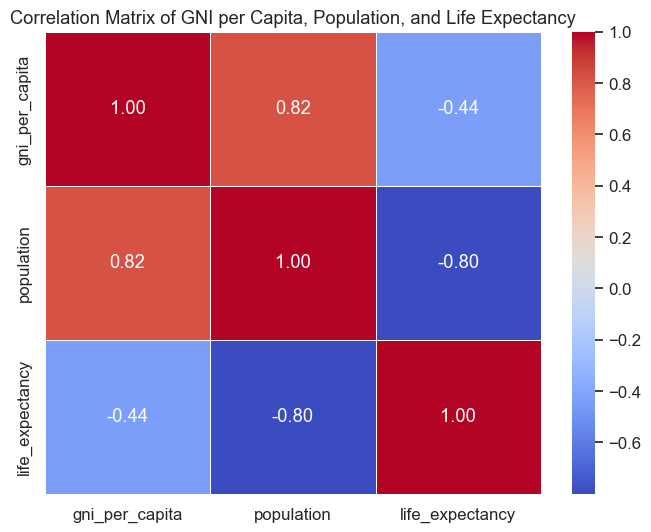

In [120]:

plt.figure(figsize=(8, 6))
sns.heatmap(filtered_df[['gni_per_capita', 'population', 'life_expectancy']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of GNI per Capita, Population, and Life Expectancy')
plt.show()


### Correlation Analysis

The correlation matrix reveals the following key relationships:

- **Population and GNI per Capita (GDP)**: A **positive correlation** suggests that countries with larger populations tend to have higher GNI per capita.
  
- **Population and Life Expectancy**: A **negative correlation** indicates that countries with larger populations often have lower life expectancy, likely due to disparities in healthcare and regional factors.
  
- **GNI per Capita and Life Expectancy**: The **negative correlation** between GNI per capita and life expectancy may reflect challenges in wealthier countries, such as lifestyle-related diseases and aging populations.

In conclusion, these correlations highlight the complex interactions between economic factors, population size, and life expectancy across the countries in the dataset.


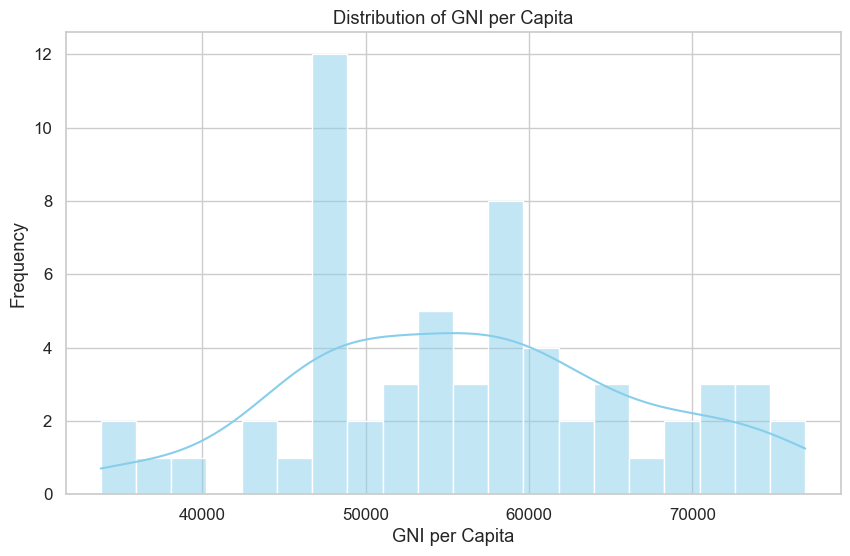

In [121]:

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['gni_per_capita'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of GNI per Capita')
plt.xlabel('GNI per Capita')
plt.ylabel('Frequency')
plt.show()


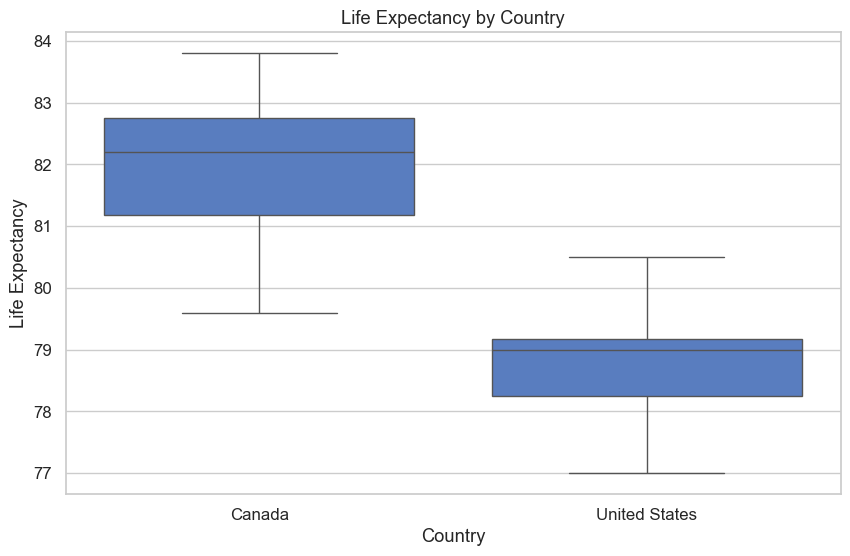

In [122]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='life_expectancy', data=filtered_df)
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()


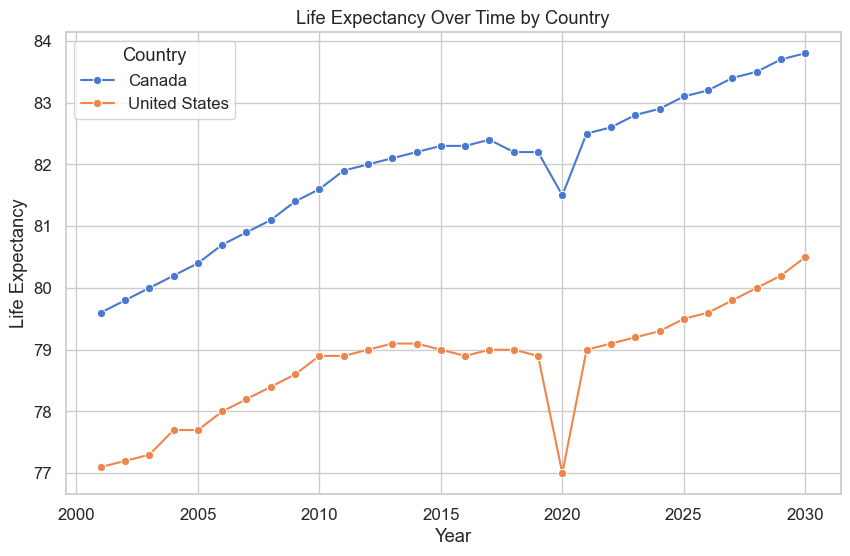

In [123]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='life_expectancy', hue='country', data=filtered_df, marker='o')
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.show()


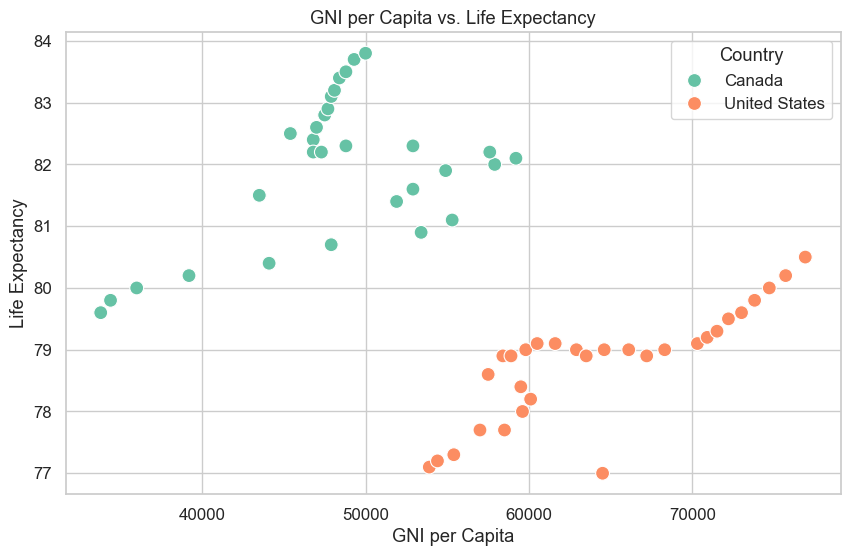

In [124]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='gni_per_capita', y='life_expectancy', hue='country', data=filtered_df, palette='Set2', s=100)
plt.title('GNI per Capita vs. Life Expectancy')
plt.xlabel('GNI per Capita')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.show()


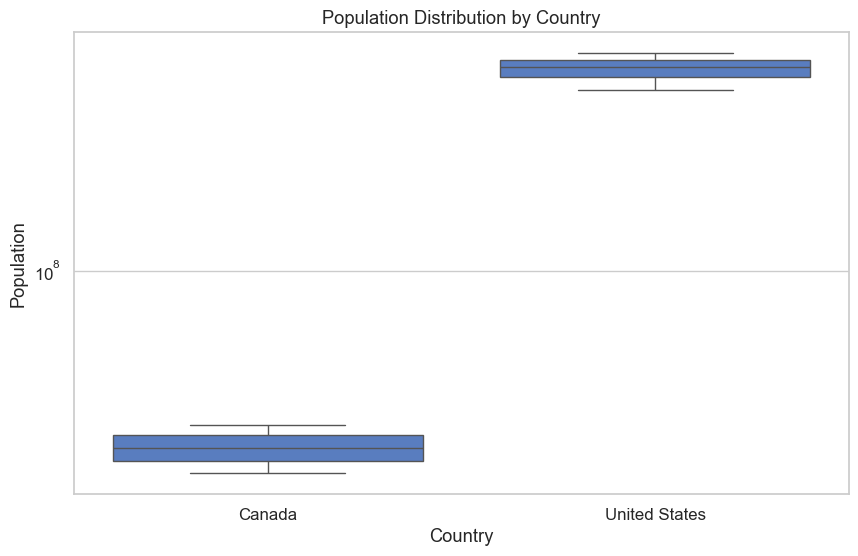

In [125]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='population', data=filtered_df)
plt.title('Population Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Population')
plt.yscale('log')  # To better visualize differences in population
plt.show()


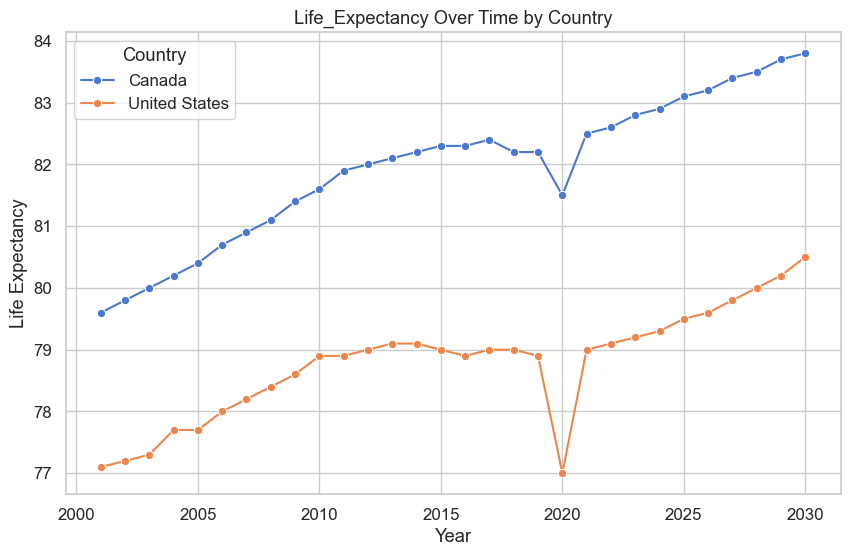

In [126]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='life_expectancy', hue='country', data=filtered_df, marker='o')
plt.title('Life_Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.show()


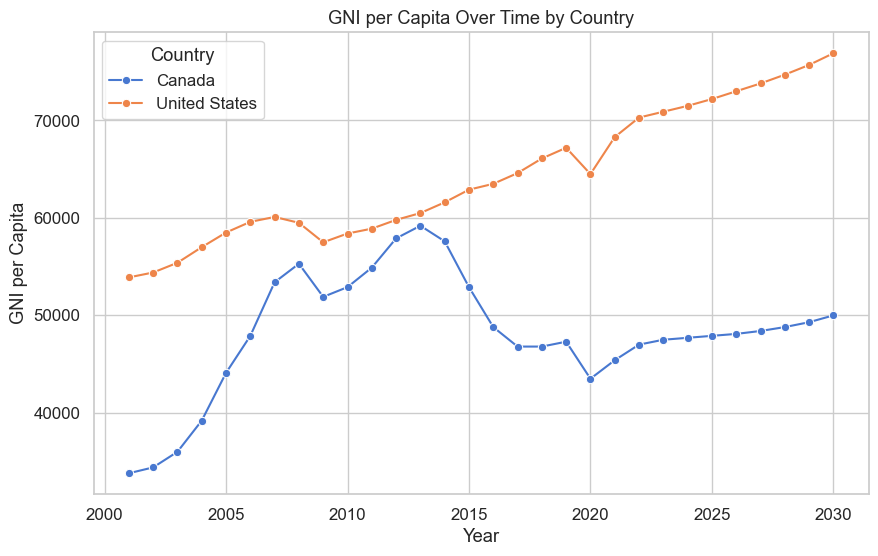

In [127]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='gni_per_capita', hue='country', data=filtered_df, marker='o')
plt.title('GNI per Capita Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')
plt.legend(title='Country')
plt.show()


### Summary

In the analysis of **Life Expectancy vs. GNI per Capita**, **Canada** stands out with the highest life expectancy among the three countries. This can be attributed to its strong healthcare system, higher quality of life, and public health policies that promote longer life expectancy.

On the other hand, the **United States** leads in terms of **GNI per Capita** and has a significantly larger population. This reflects the country's economic strength driven by its industries, technological advancements, and global economic influence. However, despite the higher GDP and population, the U.S. does not exhibit the same life expectancy as Canada, suggesting that economic prosperity does not necessarily correlate with longer life expectancy.
